In [1]:
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.geometry.ellipsoid import Ellipsoid
from large_gcs.geometry.point import Point
from large_gcs.graph.graph import Graph, DefaultGraphCostsConstraints, Edge
import matplotlib.pyplot as plt
import numpy as np
from pydrake.all import (L2NormCost, QuadraticCost)

Solving GCS problem...
Result is success!


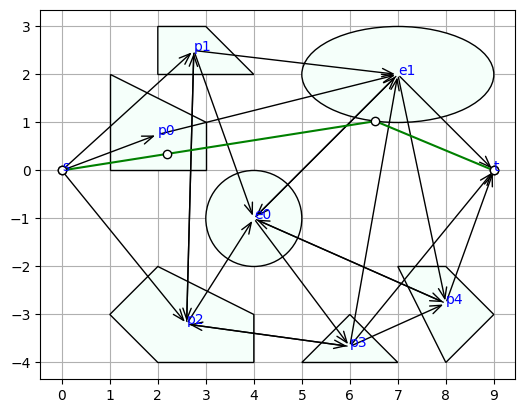

In [2]:
dim = 2
# Convex sets
points = (
    Point((0, 0)),
    Point((9, 0)),
)

polyhedra = (
    Polyhedron(([1, 0], [1, 2], [3, 1], [3, 0])),
    Polyhedron(([4, 2], [3, 3], [2, 2], [2, 3])),
    Polyhedron(([2, -2], [1, -3], [2, -4], [4, -4], [4, -3])),
    Polyhedron(([5, -4], [7, -4], [6, -3])),
    Polyhedron(([7, -2], [8, -2], [9, -3], [8, -4])),
)
ellipsoids = (
    Ellipsoid((4, -1), ([1, 0], [0, 1])),
    Ellipsoid((7, 2), ([.5, 0], [0, 1])),
)

sets = points + polyhedra + ellipsoids

# Vertex names
vertex_names = ['s', 't']
vertex_names += [f'p{i}' for i in range(len(polyhedra))]
vertex_names += [f'e{i}' for i in range(len(ellipsoids))]

# Edge costs

# Norm cost
A = np.hstack((np.eye(dim), -np.eye(dim)))
b = np.zeros((dim, 1))
edge_cost = L2NormCost(A, b)

# Norm squared cost
# I_n = np.identity(dim)
# Q = np.block([[I_n, -I_n], [-I_n, I_n]])
# b = np.zeros((2*dim,1))
# c = 0
# edge_cost = QuadraticCost(Q, b, c)

default_costs_constraints = DefaultGraphCostsConstraints(edge_costs=[edge_cost])
# Add convex sets to graph
G = Graph(default_costs_constraints)
G.add_vertices_from_sets(sets, names = vertex_names)
G.set_source('s')
G.set_target('t')

# Edges
edges = {
    's': ('p0', 'p1', 'p2'),
    'p0': ('e1',),
    'p1': ('p2', 'e0', 'e1'),
    'p2': ('p1', 'p3', 'e0'),
    'p3': ('t', 'p2', 'p4', 'e1'),
    'p4': ('t', 'e0'),
    'e0': ('p3', 'p4', 'e1'),
    'e1': ('t', 'p4', 'e0')
}
for u, vs in edges.items():
    for v in vs:
        G.add_edge(Edge(u, v))

sol = G.solve_shortest_path()
# draw convex sets and edges
plt.figure()
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
G.plot_path(sol.path)
plt.xticks(range(10))
plt.grid()

plt.show()

In [3]:
print(sol)

ShortestPathSolution(cost=9.285808987559772, time=0.011962890625, path=[('s', array([0., 0.])), ('p0', array([2.18127445, 0.34299638])), ('e1', array([6.53338475, 1.02759693])), ('t', array([8.99999998, 0.        ]))], flows=[0.9999998448850133, 8.096203152341275e-08, 7.41529552675672e-08, 0.9999998448850133, 6.149404258950096e-09, 1.0353543036383193e-08, 7.002204768858969e-08, 6.919091229469537e-09, 3.1213210850043955e-08, 5.069441367156108e-08, 7.50259320664975e-09, 8.590756356937603e-09, 4.464242682228615e-08, 3.5005378318700387e-09, 7.02351682271307e-08, 4.297765727713232e-09, 3.3134618367003894e-08, 2.3906563198162223e-08, 1.0915237520112328e-08, 0.9999999201560003, 6.043063822444525e-09, 2.8926264645044465e-09], result=<pydrake.solvers.MathematicalProgramResult object at 0x1278d55b0>)
